In [1]:
libraries = c("sp","RColorBrewer","geosphere","ggplot2","png","grid","dplyr","viridis","lubridate","extrafont", 
              "magrittr","tidyr","ggmap","ggrepel","readxl","glue","sf","raster", "purrr","repr","rgdal",
              "foreach","doParallel","doRNG","rnaturalearth","rnaturalearthdata") 
for(x in libraries) { library(x, character.only = T, warn.conflicts = F) }; rm(libraries, x)
require(sp); require(rgeos); require(maptools); require(ggspatial); require(data.table)

# to show the plots as svg-graphics in Jupyter
options(jupyter.plot_mimetypes = "image/png") 

theme_set(theme_minimal(base_size=11)) 

'%&%' = function(x,y)paste0(x,y)

remove_axes = theme(
  axis.text = element_blank(),
  axis.line = element_blank(),
  axis.ticks = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.title = element_blank()
  )

Loading required package: viridisLite
Registering fonts with R
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Linking to GEOS 3.7.1, GDAL 2.3.3, PROJ 5.2.0
rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.3.3, released 2018/12/14
 Path to GDAL shared files: /home/aakhmetz/anaconda3/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /home/aakhmetz/anaconda3/share/proj
 Linking to sp version: 1.3-1 
Loading required package: iterators
Loading required package: parallel
Loading required package: rngtools
Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:base’:

    isFALSE

Loading required package: rgeos
r

In [5]:
read.csv("ADSM-Sample_population.csv") %>%
    dplyr::select(-X) -> df_smpl
df_smpl %>% head

lat,long
<dbl>,<dbl>
35.74069,-33.94548
33.41808,-35.25260
36.08720,-34.33728
34.54750,-35.05291
33.51475,-37.56755
35.71857,-31.83168


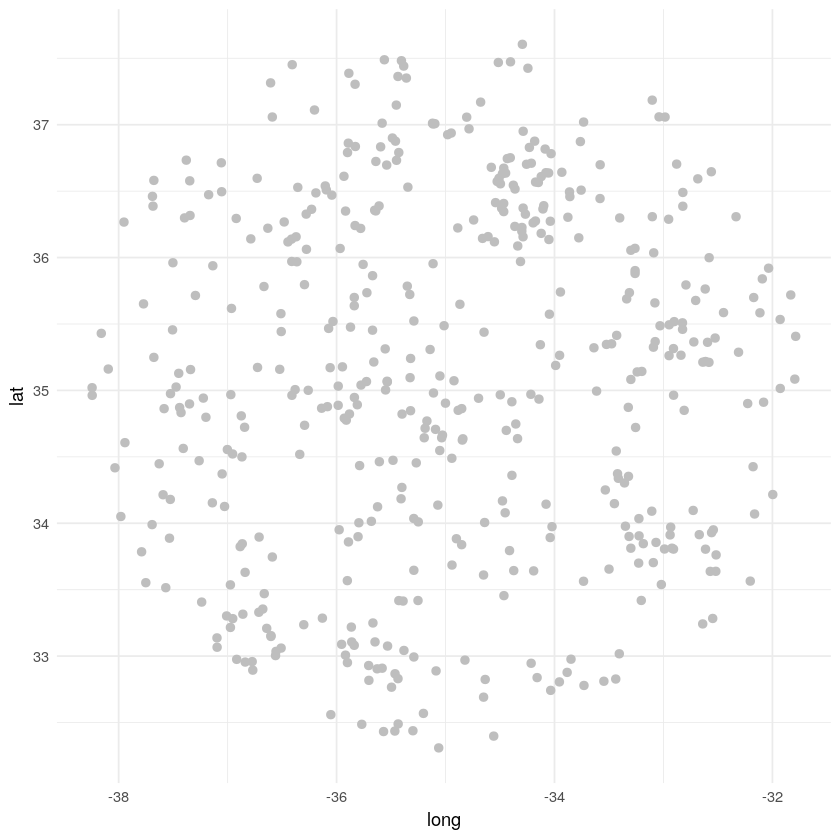

In [24]:
df_smpl %>%
    ggplot(aes(y=lat,x=long)) +
        geom_point(color='grey',size=2) -> p
p

In [25]:
"ADSM-states.csv" %>% read.csv %>%
    filter(status=="C") %>% group_by(ID) %>% filter(row_number()==1) %>% ungroup %>%
    dplyr::select(-run,-ID,-status) -> df
df %>% head

day,Lat,Lon
<int>,<dbl>,<dbl>
1,33.515,-37.5675
7,33.552,-37.7507
9,33.407,-37.2380
10,33.302,-37.0091
11,33.215,-36.9742
11,33.990,-37.6930


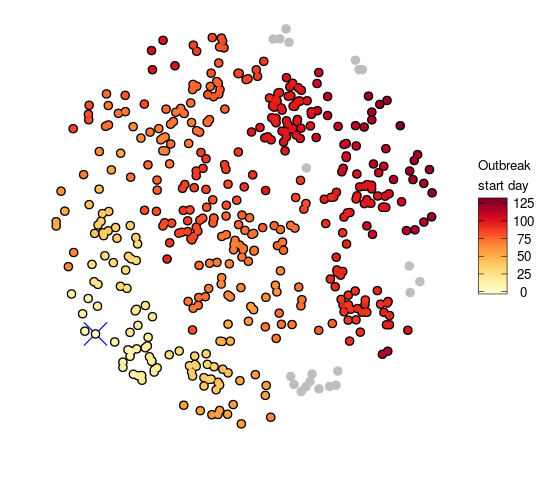

In [57]:
cs = c(4.6,4)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

p + 
    geom_point(data = df %>% filter(day==min(day)), aes(x = Lon, y = Lat),color='blue',shape=4,size=6) +
    geom_point(data = arrange(df,desc(day)), aes(x = Lon, y = Lat), color='black', size=2) +
    geom_point(data = arrange(df,desc(day)), aes(x = Lon, y = Lat, color = day),size=1.3) +
    scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"),
                          limits = c(0,max(df$day)), 
                          name = "Outbreak\nstart day", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  barheight = 4,
                                                  title.theme = element_text(size = 8),
                                                  label.theme = element_text(size = 8, hjust = 0.5))) +
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white")) -> p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../../figures/draft/AppendixFig-ADSM-map.pdf",useDingbats=FALSE)

p

In [58]:
(c(nrow(df), nrow(df_smpl)))

[1] 440 461

In [59]:
max(df$day)

[1] 129